In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm



plt.style.use('seaborn-v0_8')  # 또는 'default', 'ggplot' 등 사용 가능
sns.set(font_scale=1.2)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

# CSV 파일 읽기 - 프로젝트 루트 기준 상대 경로 사용
df = pd.read_csv("../../Data/interim/seoul/bicycle_final_data.csv")

# 데이터 기본정보 및 결측치 확인

## 1. 데이터 기본정보

In [4]:
# 데이터 기본 정보 확인
print(df.head())
print(df.info())
print(df.describe())


         date  quarter_flag  month  weekend  rental_count  used_time(avg)  \
0  2021-01-01           0.0    1.0        0             5            7.20   
1  2021-01-01           2.0    1.0        0             5           26.60   
2  2021-01-01           3.0    1.0        0            17           25.53   
3  2021-01-02           0.0    1.0        1             6           32.67   
4  2021-01-02           1.0    1.0        1             1           54.00   

   used_dis(avg)  거치대수  n_station_dis(m)  n_bus_dis(m)  ...  \
0         423.58    15            100.21         84.31  ...   
1        1017.66    15            100.21         84.31  ...   
2        1186.57    15            100.21         84.31  ...   
3        2007.42    15            100.21         84.31  ...   
4        7208.90    15            100.21         84.31  ...   

   N_of_school_within_2000m  N_of_park_within_2000m  temperature  \
0                        16                       1        -9.07   
1                     

## 2. 데이터 결측치 확인

In [7]:
# 결측치 개수 확인
print("=== 결측치 개수 ===")
print(df.isnull().sum())
print("\n=== 결측치 비율(%) ===")
print((df.isnull().sum() / len(df) * 100).round(5))

=== 결측치 개수 ===
date                            0
quarter_flag                    0
month                           0
weekend                         0
rental_count                    0
used_time(avg)                  0
used_dis(avg)                 136
거치대수                            0
n_station_dis(m)                0
n_bus_dis(m)                    0
n_school_dis(m)                 0
n_park_dis(m)                   0
N_of_stations_within_100m       0
N_of_bus_within_100m            0
N_of_school_within_100m         0
N_of_park_within_100m           0
N_of_stations_within_500m       0
N_of_bus_within_500m            0
N_of_school_within_500m         0
N_of_park_within_500m           0
N_of_stations_within_1000m      0
N_of_bus_within_1000m           0
N_of_school_within_1000m        0
N_of_park_within_1000m          0
N_of_stations_within_1500m      0
N_of_bus_within_1500m           0
N_of_school_within_1500m        0
N_of_park_within_1500m          0
N_of_stations_within_2000m      0

## 3. rental_count 분포 분석

In [8]:
# 기본 통계량
print("=== rental_count 기본 통계량 ===")
print(df['rental_count'].describe())
print(f"\n왜도(Skewness): {df['rental_count'].skew():.4f}")
print(f"첨도(Kurtosis): {df['rental_count'].kurtosis():.4f}")

=== rental_count 기본 통계량 ===
count    1.458161e+07
mean     1.195186e+01
std      1.584847e+01
min      1.000000e+00
25%      3.000000e+00
50%      7.000000e+00
75%      1.500000e+01
max      9.320000e+02
Name: rental_count, dtype: float64

왜도(Skewness): 5.7061
첨도(Kurtosis): 89.7550


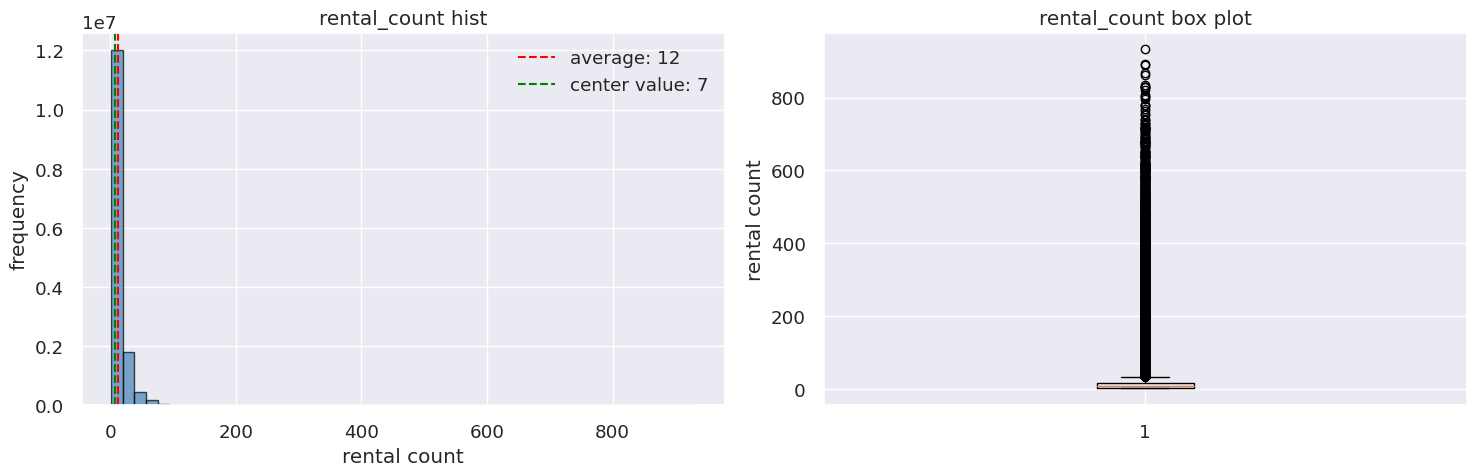

In [12]:
# 히스토그램과 박스플롯
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(df['rental_count'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('rental_count hist')
axes[0].set_xlabel('rental count')
axes[0].set_ylabel('frequency')
axes[0].axvline(df['rental_count'].mean(), color='red', linestyle='--', label=f'average: {df["rental_count"].mean():.0f}')
axes[0].axvline(df['rental_count'].median(), color='green', linestyle='--',
                label=f'center value: {df["rental_count"].median():.0f}')
axes[0].legend()

axes[1].boxplot(df['rental_count'], vert=True)
axes[1].set_title('rental_count box plot')
axes[1].set_ylabel('rental count')

plt.tight_layout()
plt.show()

In [13]:
# 분위수 분석
print("=== rental_count 분위수 분석 ===")
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
for q in quantiles:
    print(f"{int(q * 100)}% 분위수: {df['rental_count'].quantile(q):.2f}")

=== rental_count 분위수 분석 ===
10% 분위수: 1.00
25% 분위수: 3.00
50% 분위수: 7.00
75% 분위수: 15.00
90% 분위수: 28.00
95% 분위수: 39.00
99% 분위수: 72.00


In [14]:
# 이상치 분석 (IQR 방법)
Q1 = df['rental_count'].quantile(0.25)
Q3 = df['rental_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['rental_count'] < lower_bound) | (df['rental_count'] > upper_bound)]
print(f"=== 이상치 분석 (IQR 방법) ===")
print(f"하한: {lower_bound:.2f}")
print(f"상한: {upper_bound:.2f}")
print(f"이상치 개수: {len(outliers)} ({len(outliers) / len(df) * 100:.2f}%)")

=== 이상치 분석 (IQR 방법) ===
하한: -15.00
상한: 33.00
이상치 개수: 1016214 (6.97%)


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

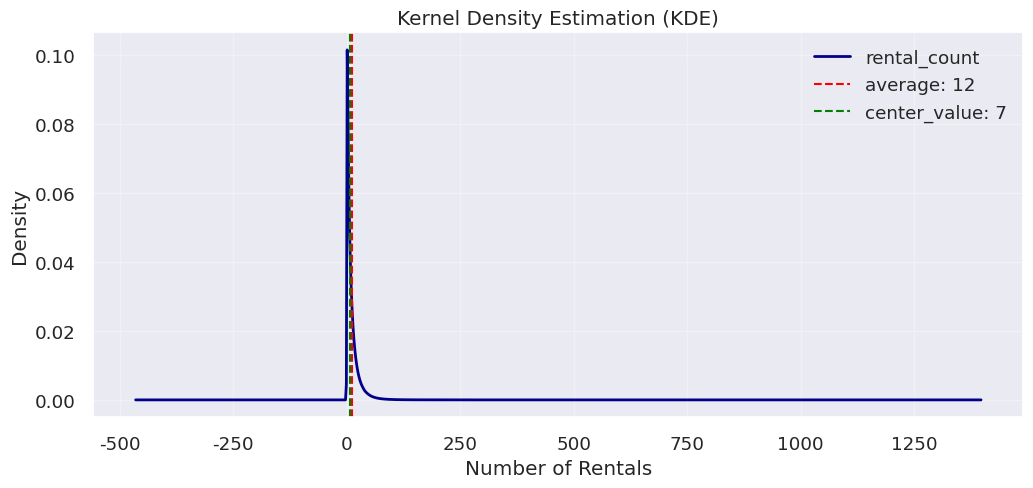

In [4]:
# KDE 플롯
plt.figure(figsize=(12, 5))
df['rental_count'].plot(kind='kde', linewidth=2, color='darkblue')
plt.title('Kernel Density Estimation (KDE)')
plt.xlabel('Number of Rentals')
plt.ylabel('Density')
plt.axvline(df['rental_count'].mean(), color='red', linestyle='--', label=f'average: {df["rental_count"].mean():.0f}')
plt.axvline(df['rental_count'].median(), color='green', linestyle='--', label=f'center_value: {df["rental_count"].median():.0f}')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
